In [15]:
import torch
import matplotlib.pyplot as plt

In [16]:
words = open('names.txt', 'r').read().splitlines()
print(len(words))
print(min(len(w) for w in words))
print(max(len(w) for w in words ))
words[:10]

32033
2
15


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [17]:
for w in words[:3]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a
o l
l i
i v
v i
i a
a v
v a


In [18]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(w,w[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [19]:
b.items() # Returns tuples of key,value

dict_items([(('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('a', 'v'), 834), (('v', 'a'), 642), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 1826), (('b', 'i'), 217), (('i', 'g'), 428), (('g', 'a'), 330), (('a', 'i'), 1650), (('i', 'l'), 1345), (('i', 'z'), 277), (('z', 'a'), 860), (('e', 't'), 580), (('t', 'h'), 647), (('r', 'y'), 773), (('o', 'f'), 34), (('f', 'i'), 160), (('c'

In [20]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', 'n'), 5438),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('a', 'l'), 2528),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('o', 'n'), 2411),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('a', 'y'), 2050),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('j', 'a'), 1473),
 (('n', 'e'), 1359),
 (('l', 'l'), 1345),
 (('i', 'l'), 1345),
 (('i', 's'), 1316),
 (('d', 'a'), 1303),
 (('s', 'h'), 1285),
 (('d', 'e'), 1283),
 (('e', 'e'), 1271),
 (('m', 'i'), 1256),
 (('s', 'a'), 1201),
 (('a', 's'), 1118),
 (('y', 'l'), 1104),
 (('e', 'y'), 1070),
 (('o', 'r'), 1059),
 (('a', 'd'), 1042),
 (('t', 'a'), 1027),
 (('v', 'i'), 911),
 (('k', 'e'), 

In [21]:
a = torch.zeros(3,5)
a.dtype

torch.float32

In [22]:
a = torch.zeros((3,5), dtype = torch.int32)
a[1,3] += 1
a[0,0]  += 5
a

tensor([[5, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [23]:
N = torch.zeros((28,28), dtype = torch.int32)
chars = sorted(list(set(''.join(words))))

In [24]:
stoi = {s:i+1 for i,s in enumerate(chars)}
# stoi
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [25]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

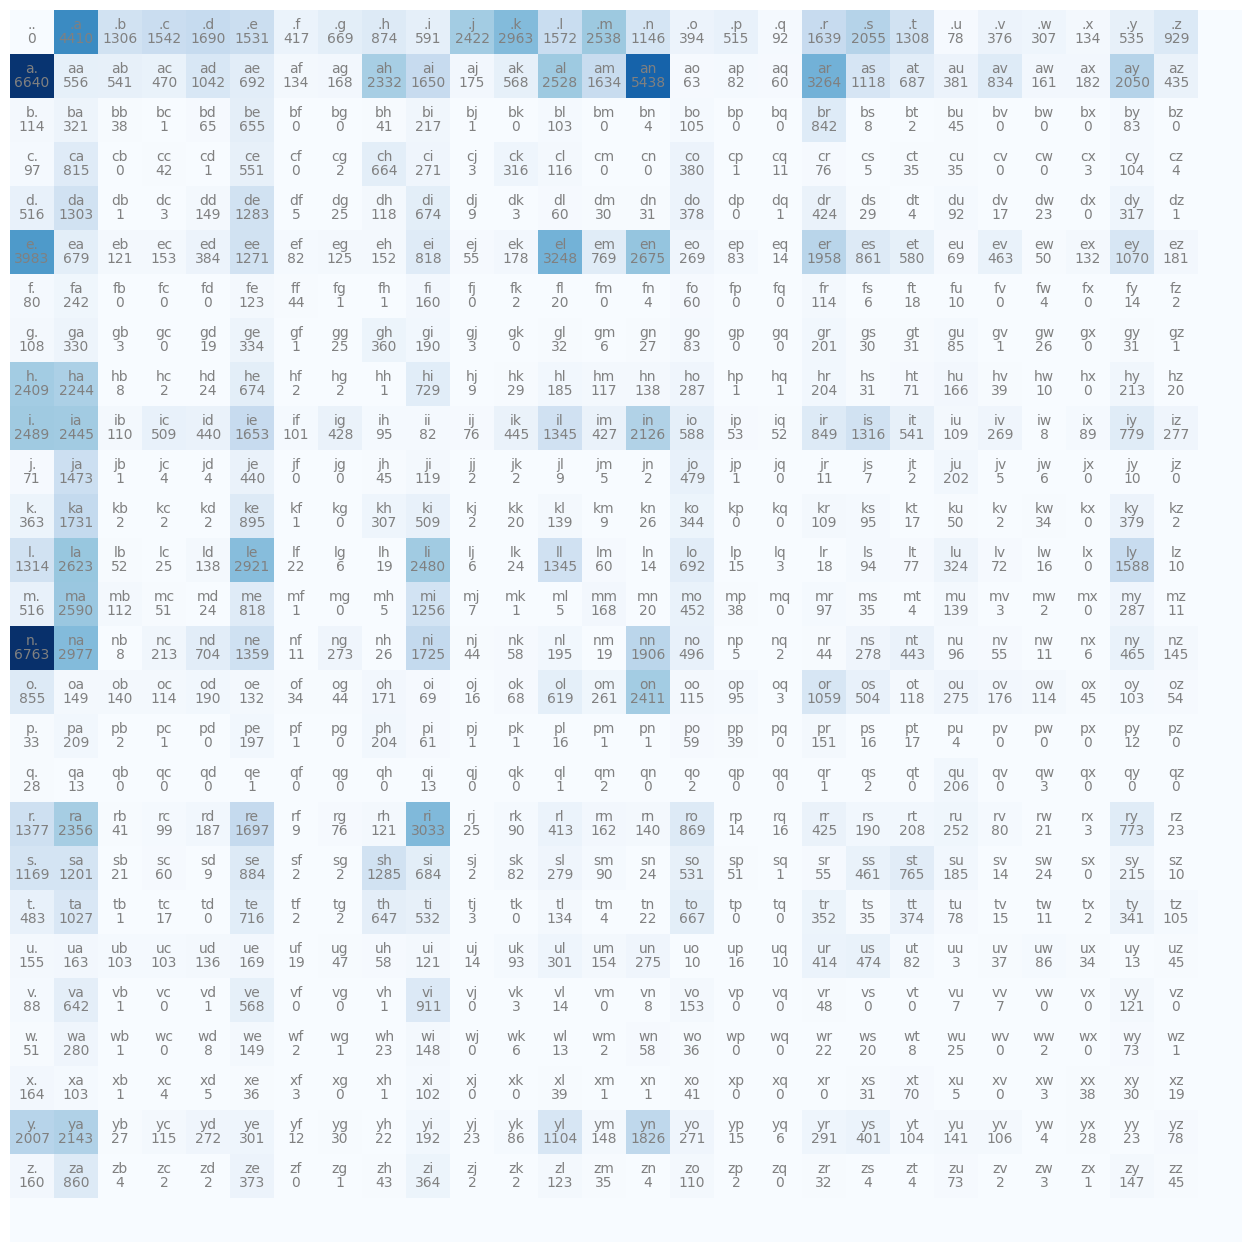

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center", va="bottom",  color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis("off");

In [27]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [28]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [29]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [30]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p /p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [31]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [32]:
p.shape

torch.Size([3])

In [33]:
P = (N+1).float()
P.shape

torch.Size([28, 28])

In [34]:
P.sum(0, keepdim=True).shape

torch.Size([1, 28])

In [35]:
P.sum(1, keepdim=True).shape

torch.Size([28, 1])

In [36]:
P.sum(0).shape

torch.Size([28])

In [37]:
P.sum(1).shape

torch.Size([28])

In [38]:
P /= P.sum(1, keepdim=True) #BROADCASTING

In [39]:
P[0].sum()

tensor(1.0000)

In [40]:
P.shape

torch.Size([28, 28])

In [41]:
P.sum(1).shape

torch.Size([28])

In [42]:
P.sum(1, keepdims=True).shape

torch.Size([28, 1])

In [43]:
g = torch.Generator().manual_seed(2147483649)

for i in range(20):
    out = []
    ix = 0
    while True:
        p =P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

lyli.
ndaiahla.
ara.
ra.
a.
siren.
kamastitriti.
e.
ssde.
kasia.
ckali.
cayn.
tlos.
lyleeeinin.
s.
mian.
enaro.
ashenanarigork.
aam.
garah.
